In [ ]:
# import 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('heart_disease_health_indicators_BRFSS2015.csv')

In [3]:
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [5]:
# Display summary statistics for numerical features
print(df.describe())


       HeartDiseaseorAttack         HighBP       HighChol      CholCheck  \
count         253680.000000  253680.000000  253680.000000  253680.000000   
mean               0.094186       0.429001       0.424121       0.962670   
std                0.292087       0.494934       0.494210       0.189571   
min                0.000000       0.000000       0.000000       0.000000   
25%                0.000000       0.000000       0.000000       1.000000   
50%                0.000000       0.000000       0.000000       1.000000   
75%                0.000000       1.000000       1.000000       1.000000   
max                1.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke       Diabetes  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean       28.382364       0.443169       0.040571       0.296921   
std         6.608694       0.496761       0.197294       0.698160   
min        12.000000       0.000000    

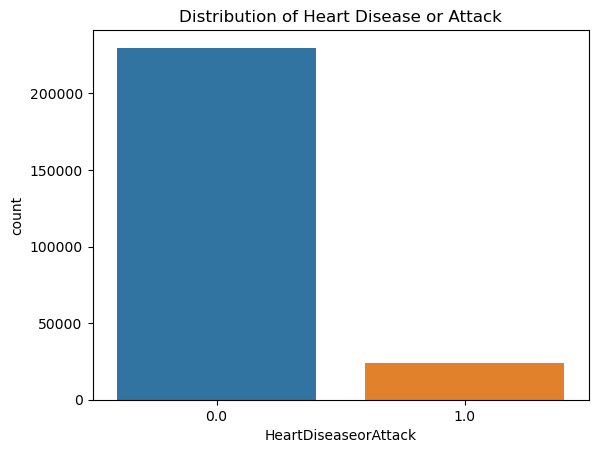

In [6]:
# Check the distribution of the target variable
sns.countplot(x='HeartDiseaseorAttack', data=df)
plt.title('Distribution of Heart Disease or Attack')
plt.show()

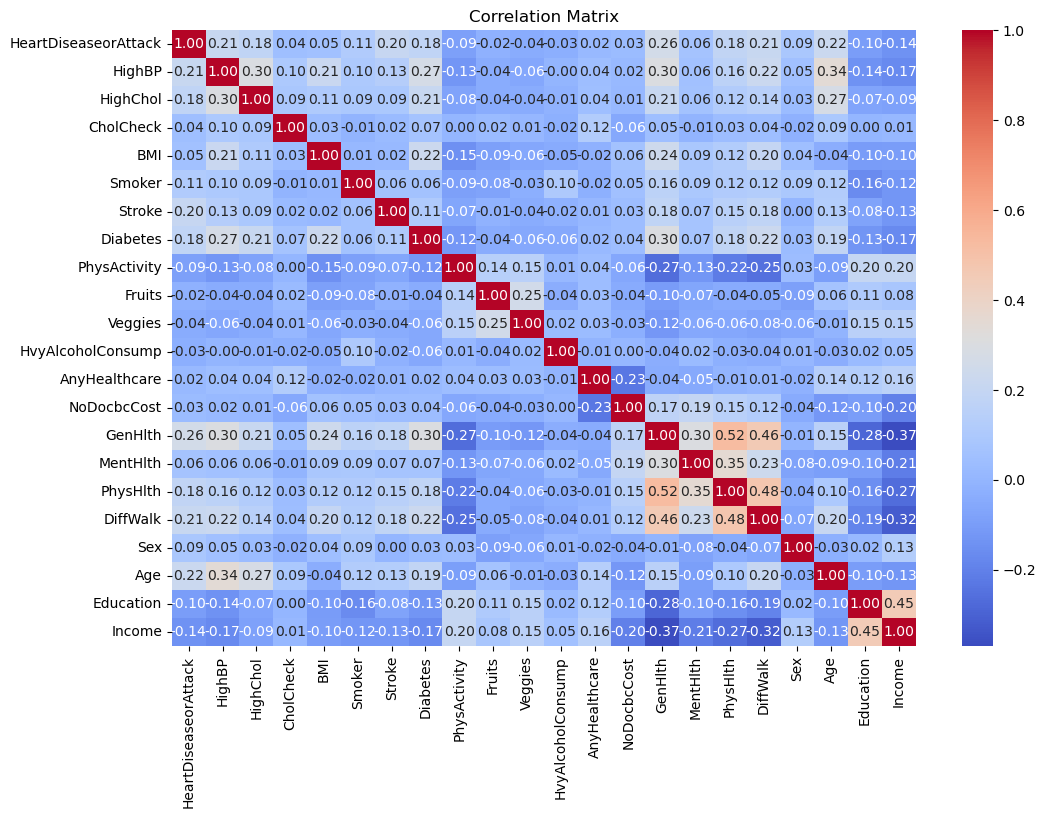

In [7]:
# Visualize correlations between numerical features
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## Milestone 4 

Based on the correlation matrix above, some of the features that show a strong correlation with the target variable, "HeartDiseaseorAttack" are:

HighBP: This feature has a moderate positive correlation (0.209) with HeartDiseaseorAttack, indicating that individuals with high blood pressure are more likely to have heart disease or attack.

HighChol: Similar to HighBP, HighChol also shows a moderate positive correlation (0.181) with HeartDiseaseorAttack, suggesting that individuals with high cholesterol levels may be at higher risk of heart disease or attack.

Stroke: This feature exhibits a moderate positive correlation (0.203) with HeartDiseaseorAttack, implying that individuals who have had a stroke are more likely to have heart disease or attack.

Diabetes: Diabetes shows a moderate positive correlation (0.180) with HeartDiseaseorAttack, indicating that individuals with diabetes are more likely to have heart disease or attack.

GenHlth: General health (GenHlth) has a moderate positive correlation (0.258) with HeartDiseaseorAttack, suggesting that individuals who rate their general health as poor are more likely to have heart disease or attack.

DiffWalk: Difficulty walking (DiffWalk) exhibits a moderate positive correlation (0.213) with HeartDiseaseorAttack, indicating that individuals who have difficulty walking are more likely to have heart disease or attack.

Age: The age of the individuals also has a relatively strong positive correlation  (0.22). Based on this we can infer that individuals that are older have a higher likelihood of jheaert disease or attack. 

## Resampling

As previously mentioned, this dataset is imbalanced due to the low frequency of the target variable 'HeartDiseaseorAttack'. Therefore, I am going to resmaple my data. 

In [8]:
from imblearn.over_sampling import RandomOverSampler

# Separate features and target variable
X = df.drop('HeartDiseaseorAttack', axis=1)
y = df['HeartDiseaseorAttack']

# Initialize RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Resample the dataset
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Convert the resampled data back to a DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['HeartDiseaseorAttack'] = y_resampled

# Check the class distribution after resampling
print(df_resampled['HeartDiseaseorAttack'].value_counts())

0.0    229787
1.0    229787
Name: HeartDiseaseorAttack, dtype: int64


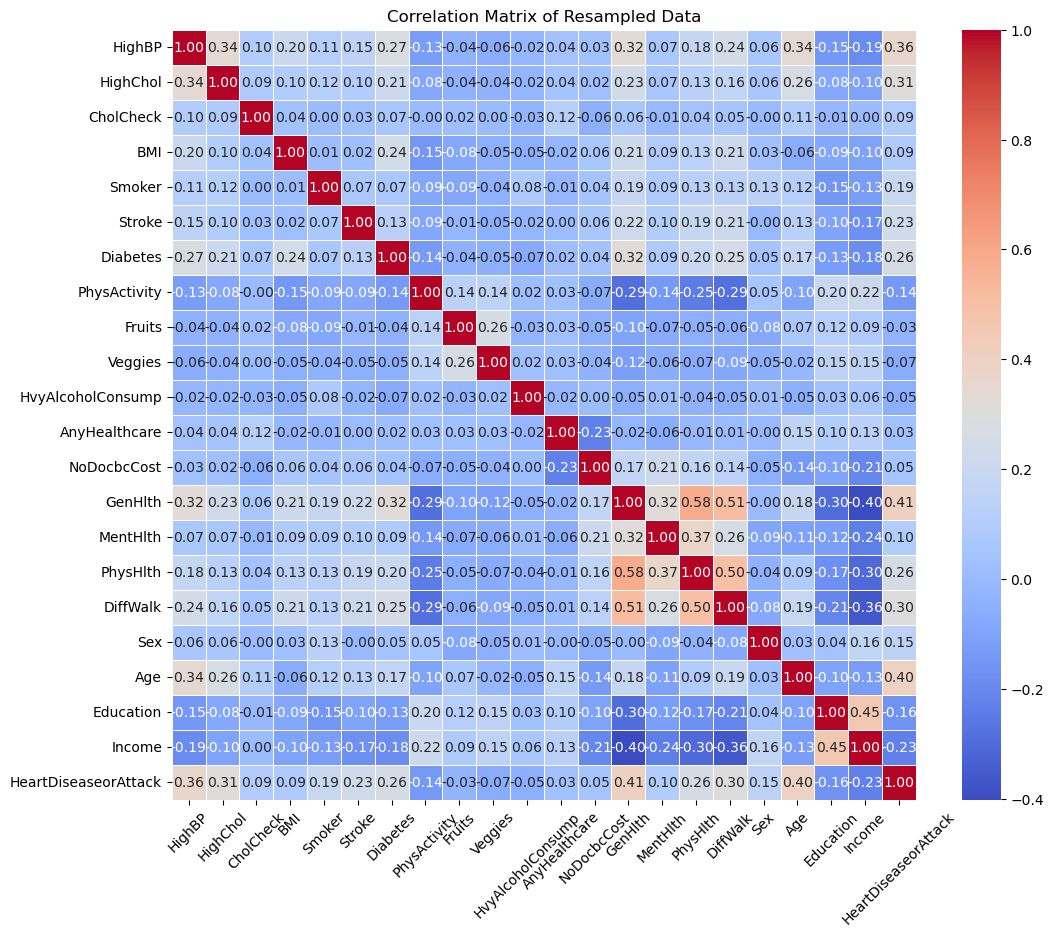

In [9]:
# Create a correlation matrix
corr_matrix = df_resampled.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Rotate the tick labels for better readability
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Display the plot
plt.title('Correlation Matrix of Resampled Data')
plt.show()

Here are the features that show relatively strong correlations (absolute correlation value >= 0.3) with the target variable after resampling:

HighBP: 0.360118

HighChol: 0.307183

GenHlth: 0.407911

Age: 0.398020

DiffWalk: 0.302530

## Feature Selection 

Next I want to use feature importance from tree-based models to select the top features based on my resampled df. I'd like to see if the features that I've selected using the correlation matrix align with this method as well. It will give me a second vote of confidence that I've selected the most appropriate features for my model. 

In [10]:
from sklearn.ensemble import RandomForestClassifier


# Define features (X) and target variable (y)
X = df_resampled.drop(columns=['HeartDiseaseorAttack'])  # Features are all columns except the target variable
y = df_resampled['HeartDiseaseorAttack']  # Target variable is 'HeartDiseaseorAttack'

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Extract feature importances
feature_importances = rf_classifier.feature_importances_

# Create a dictionary of feature importance scores with feature names
feature_importance_dict = dict(zip(X_train.columns, feature_importances))

# Sort the dictionary by importance scores (descending order)
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print the top N features
top_n = 10  # You can change this number as needed
top_features = sorted_feature_importance[:top_n]
print("Top", top_n, "features:")
for feature, importance in top_features:
    print(feature, ":", importance)

Top 10 features:
BMI : 0.15586095223978552
Age : 0.1484131496997207
GenHlth : 0.09085167994661068
Income : 0.0847448693716763
PhysHlth : 0.07240460161382474
HighBP : 0.06446090258710956
Education : 0.056021391290091815
MentHlth : 0.05034374387830894
HighChol : 0.041118387194262855
DiffWalk : 0.03258492925096662


Since not all of these features are binary, I will employ binning techniques before creating my logistic regression model. 

The values of the nonbinary features represent the following:

GenHlth (page 13 of the BRFSS Codebook)
Description: Would you say your general health is:

1 - Excellent 

2 - Very Good

3 - Good

4 - Fair

5 - Poor

7 - Don't know

9 - Refused


Physhlth  (page 13 of the BRFSS Codebook)
Description: is to indicate for how many days during the past 30 days was the individuals's physical health not good

1 - 30: Number of days

88: None

77: Don't know/Not sure

99: Refused 

Menthlth (page 13 of the BRFSS Codebook)
Description: is to indicate for how many days during the past 30 days was the individuals's physical health not good

1 - 30: Number of days

88: None

77: Don't know/Not sure

99: Refused 

Income (page 26 of the BRFSS Codebook)
Description: Income categories

1 = Less than $10,000

2 = $10,000 - $15,000

3 = $15,000 - $20,000

4 = $20,000 - $25,000

5 = $25,000 - $35,000 

6 = $35,000 - $50,000

7 = $50,000 - $75,000

8 = $75,000 or more 


Age:

1 = 18-24

2 = 25-29

3 = 30-34

4 = 35-39

5 = 40-44

6 = 45-49

7 = 50-54

8 = 55-59

9 = 60-64

10 = 65-69

11 = 70-74

12 = 75-79

13 = 80 or older

14 = Don't know/Refused


Education (page 22 of the BRFSS Codebook):

Description: Highest grade or year of school completed

1 = Never attended school or only kindergarten

2 = Grades 1 - 8

3 = Grades 9 - 11

4 = Grade 12 (High School Graduate) 

5 = College 1 year to 3 years

6 = College 4 years or more (College Graduate) 


In [11]:
import pandas as pd

# Create dummy variables for the 'Income' feature
income_dummies = pd.get_dummies(df_resampled['Income'], prefix='Income')

# Create dummy variables for the 'Education' feature
education_dummies = pd.get_dummies(df_resampled['Education'], prefix='Education')

# Concatenate the dummy variables with the original DataFrame
df_final = pd.concat([df_resampled, income_dummies, education_dummies], axis=1)

# Drop the original 'Income' and 'Education' columns since they are no longer needed
df_final.drop(columns=['Income', 'Education'], inplace=True)

df_final

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,...,Income_5.0,Income_6.0,Income_7.0,Income_8.0,Education_1.0,Education_2.0,Education_3.0,Education_4.0,Education_5.0,Education_6.0
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,1,0,0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,1,0,0,0,1,0,0
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0,1,0,0,0,0,1,0,0,0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459569,1.0,1.0,1.0,43.0,1.0,0.0,2.0,1.0,1.0,0.0,...,1,0,0,0,0,0,0,0,1,0
459570,1.0,1.0,1.0,31.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0,0,1,0,0,0,0,0,0,1
459571,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
459572,0.0,0.0,1.0,33.0,0.0,0.0,2.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,1,0,0


## Logisitic Regression

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define features (X) and target variable (y)
X = df_final.drop(columns=['HeartDiseaseorAttack'])
y = df_final['HeartDiseaseorAttack']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)

In [14]:
# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7699831365935919

Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.75      0.76     46033
         1.0       0.76      0.79      0.77     45882

    accuracy                           0.77     91915
   macro avg       0.77      0.77      0.77     91915
weighted avg       0.77      0.77      0.77     91915


Confusion Matrix:
[[34408 11625]
 [ 9517 36365]]


The logistic regression model achieved an accuracy of approximately 76.99%.

Precision for class 0 (no heart disease or attack) is 0.78, indicating that among the instances predicted as not having heart disease or attack, 78% were correctly classified.
Recall for class 0 is 0.75, indicating that the model correctly identified 75% of the instances that actually do not have heart disease or attack.
F1-score for class 0 is 0.76, which is the harmonic mean of precision and recall for class 0.
Support for class 0 is 46033, meaning there are 46033 instances in the test set that belong to class 0.


Similarly, for class 1 (having heart disease or attack):
Precision is 0.76, indicating that among the instances predicted as having heart disease or attack, 76% were correctly classified.
Recall is 0.79, indicating that the model correctly identified 79% of the instances that actually have heart disease or attack.
F1-score is 0.77, the harmonic mean of precision and recall for class 1.
Support is 45882, meaning there are 45882 instances in the test set that belong to class 1.

Based on the confusion matrix, the model results were as follows:

True Negatives (TN): 34408 instances were correctly classified as not having heart disease or attack.
False Positives (FP): 11625 instances were incorrectly classified as having heart disease or attack when they actually didn't.
False Negatives (FN): 9517 instances were incorrectly classified as not having heart disease or attack when they actually did.
True Positives (TP): 36365 instances were correctly classified as having heart disease or attack.

## Conclusion 

The logistic regression model achieved an accuracy of approximately 77%. While this indicates that the model performs moderately well in distinguishing between instances with and without heart disease or attack, further analysis is needed to improve its predictive capability.

Precision and Recall: Precision refers to the percentage of correctly predicted positive cases out of all predicted positive cases, while recall refers to the percentage of correctly predicted positive cases out of all actual positive cases. In this case, both precision and recall are around 76-78% which suggests that the model has a balanced performance in identifying both positive and negative cases.

False Positives and False Negatives: The model incorrectly classified approximately 11,625 instances as having heart disease or attack when they didn't (false positives), and 9,517 instances as not having heart disease or attack when they did (false negatives). These misclassifications could have significant implications, as false negatives may result in undiagnosed cases, while false positives may lead to unnecessary medical interventions.

Feature Importance: The top features identified through tree-based feature importance analysis, such as BMI, Age, General Health (GenHlth), Income, Physical Health (PhysHlth), and Education, indicate their relevance in predicting heart disease or attack. These features provide valuable insights into potential risk factors and can guide further research or interventions.

Recommendations:

Feature Engineering: Explore additional feature engineering techniques to capture more nuanced relationships between predictors and the target variable. This may involve creating interaction terms, polynomial features, or deriving new features from existing ones.
Model Tuning: Experiment with various hyperparameters for the logistic regression model or explore alternative classification algorithms (e.g., decision trees, random forests, etc.) to potentially improve performance.
Data Collection: It would be ideal to collect more diverse and comprehensive data, including additional medical history, lifestyle factors, genetic predispositions, and environmental factors, to enhance the model's predictive accuracy.
